In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Renamed seaborn to sns for brevity

# Import machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')  # Suppress warnings during execution

In [38]:
# Reading the CSV file 'TSLA.csv' into a pandas DataFrame
# Assumption: 'TSLA.csv' file is located in the current directory
df = pd.read_csv('TSLA.csv')

# Displaying the first few rows of the DataFrame to inspect the data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [40]:
# Displaying the shape of the DataFrame (number of rows, number of columns)
df.shape

(2416, 7)

In [41]:
# Generating descriptive statistics of the DataFrame
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [42]:
# Displaying concise summary information about the DataFrame, including column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


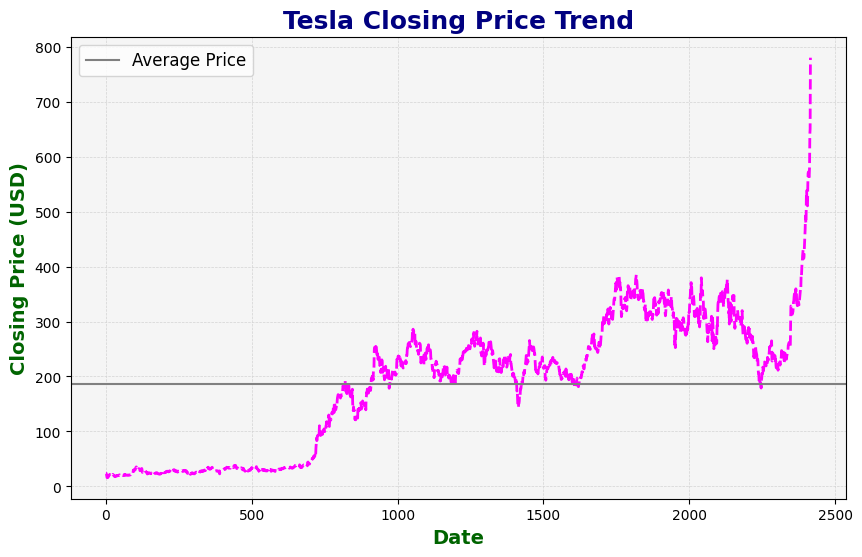

In [47]:
# Setting the size of the plot figure
plt.figure(figsize=(10, 6))

# Plotting the 'Close' column from the DataFrame with a unique color and linestyle
plt.plot(df['Close'], color='magenta', linestyle='--', linewidth=2)

# Adding title to the plot with a unique font style
plt.title('Tesla Closing Price Trend', fontsize=18, fontweight='bold', color='navy')

# Adding label to the y-axis with a unique font style
plt.ylabel('Closing Price (USD)', fontsize=14, fontweight='bold', color='darkgreen')

# Adding label to the x-axis with a unique font style
plt.xlabel('Date', fontsize=14, fontweight='bold', color='darkgreen')

# Customizing the gridlines with a unique color
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('whitesmoke')

# Adding horizontal line at average closing price for reference
average_price = df['Close'].mean()
plt.axhline(average_price, color='gray', linestyle='-', linewidth=1.5, label='Average Price')

# Adding a legend to the plot
plt.legend(loc='upper left', fontsize=12)

# Displaying the plot
plt.show()

In [48]:
# Displaying the first few rows of the DataFrame
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [49]:
# Filtering rows where the 'Close' column is equal to the 'Adj Close' column,
# and displaying the shape of the resulting DataFrame
df[df['Close'] == df['Adj Close']].shape


(2416, 7)

In [50]:
# Dropping the 'Adj Close' column from the DataFrame along the column axis
df = df.drop(['Adj Close'], axis=1)


In [51]:
# Calculating the sum of missing values in each column of the DataFrame
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

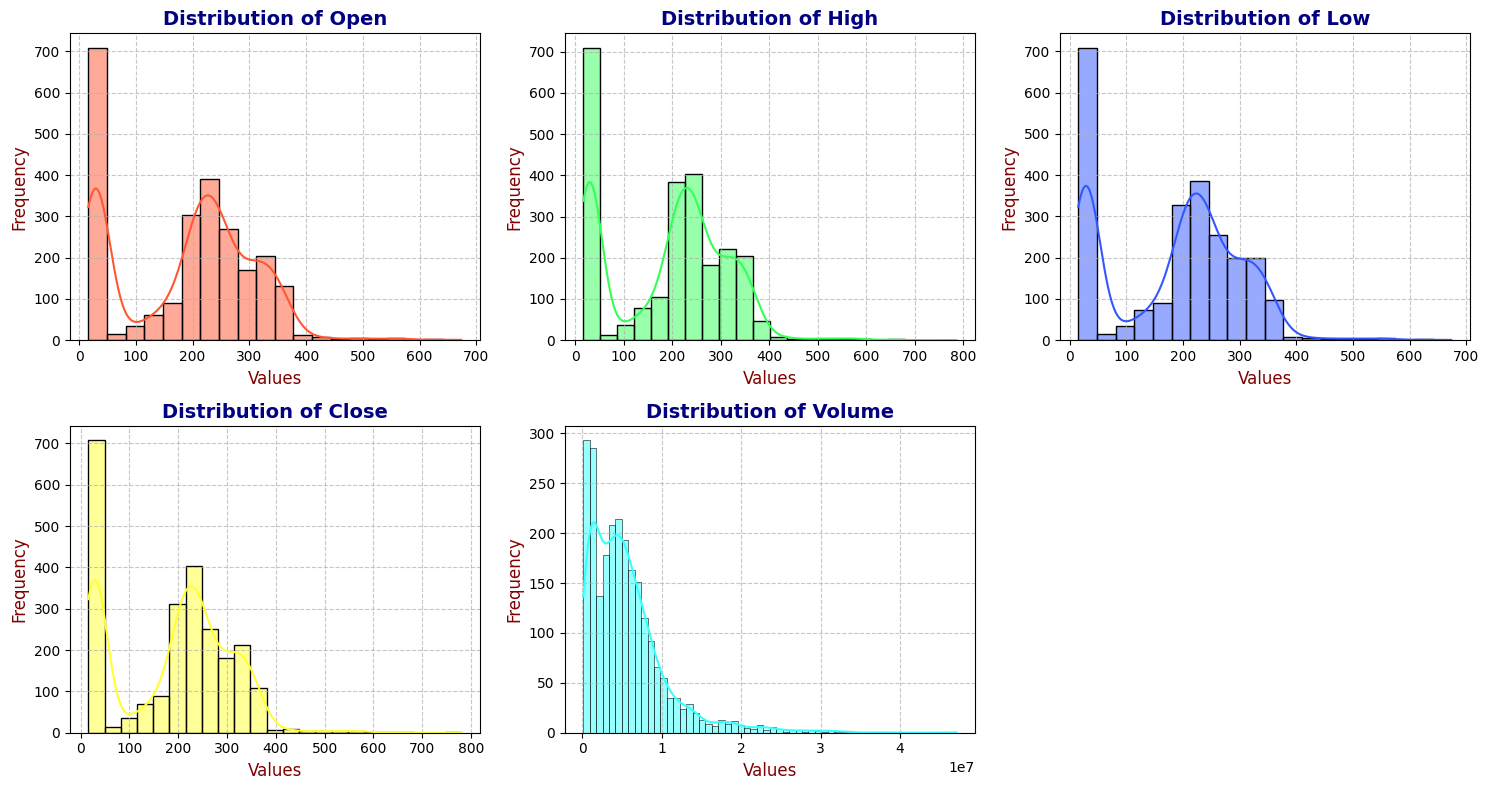

In [53]:
# New color palette
custom_palette = ['#FF5733', '#33FF57', '#3357FF', '#FFFF33', '#33FFFF']

# New figure size
plt.figure(figsize=(15, 8))

features = ['Open', 'High', 'Low', 'Close', 'Volume']

for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], color=custom_palette[i], kde=True)
    plt.title(f'Distribution of {col}', fontsize=14, color='navy', fontweight='bold')
    plt.xlabel('Values', fontsize=12, color='maroon')
    plt.ylabel('Frequency', fontsize=12, color='maroon')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [54]:
# Splitting the 'Date' column into separate columns for day, month, and year
splitted = df['Date'].str.split('-', expand=True)

# Adding a new column 'day' with the day component of the date
df['day'] = splitted[2].astype('int')

# Adding a new column 'month' with the month component of the date
df['month'] = splitted[1].astype('int')

# Adding a new column 'year' with the year component of the date
df['year'] = splitted[0].astype('int')

# Displaying the modified DataFrame with new columns
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [55]:
# Adding a new column 'is_quarter_end' indicating whether the month is the end of a quarter
df['is_quarter_end'] = np.where(df['month'] % 3 == 0, 1, 0)

# Displaying the DataFrame with the new 'is_quarter_end' column
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [68]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


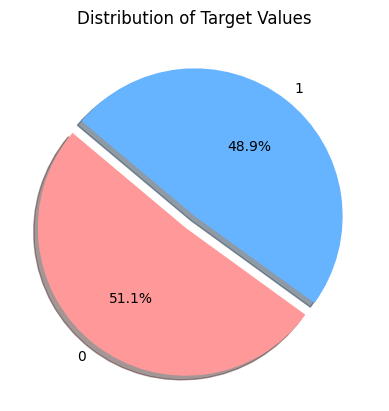

In [70]:
# Data
target_counts = df['target'].value_counts().values

# Customizing colors
colors = ['#ff9999', '#66b3ff']

# Customizing explode
explode = (0.1, 0)  # Explode the first slice

# Customizing shadow and start angle
plt.pie(target_counts,
        labels=[0, 1],
        autopct='%1.1f%%',
        colors=colors,
        explode=explode,
        shadow=True,
        startangle=140)

# Adding a title
plt.title('Distribution of Target Values')

# Displaying the pie chart
plt.show()

In [71]:
# Selecting features and target variables
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Scaling the features using StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Splitting the dataset into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)

# Printing the shapes of the training and validation sets
print(X_train.shape, X_valid.shape)

(2174, 3) (242, 3)


In [72]:
from sklearn.linear_model import LogisticRegression  # Importing Logistic Regression classifier
from sklearn.svm import SVC  # Importing Support Vector Classifier
from xgboost import XGBClassifier  # Importing XGBoost Classifier
from sklearn import metrics  # Importing metrics for evaluation

# Defining the list of models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

# Training the models and evaluating performance
for model in models:
    model.fit(X_train, Y_train)
    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:,1]))


LogisticRegression() : 
Training Accuracy :  0.5228802330060918
Validation Accuracy :  0.4923371647509579
SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5294546963173692
Validation Accuracy :  0.4625068418171866
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Ac